In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dev0914sharma/customer-clustering")

print("Path to dataset files:", path)

100%|██████████| 25.9k/25.9k [00:00<00:00, 246kB/s]

Extracting files...
Path to dataset files: C:\Users\Javi\.cache\kagglehub\datasets\dev0914sharma\customer-clustering\versions\1


In [4]:
import pandas as pd

df = pd.read_csv("segmentation data.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Settlement size'}>, <Axes: >]],
      dtype=object)

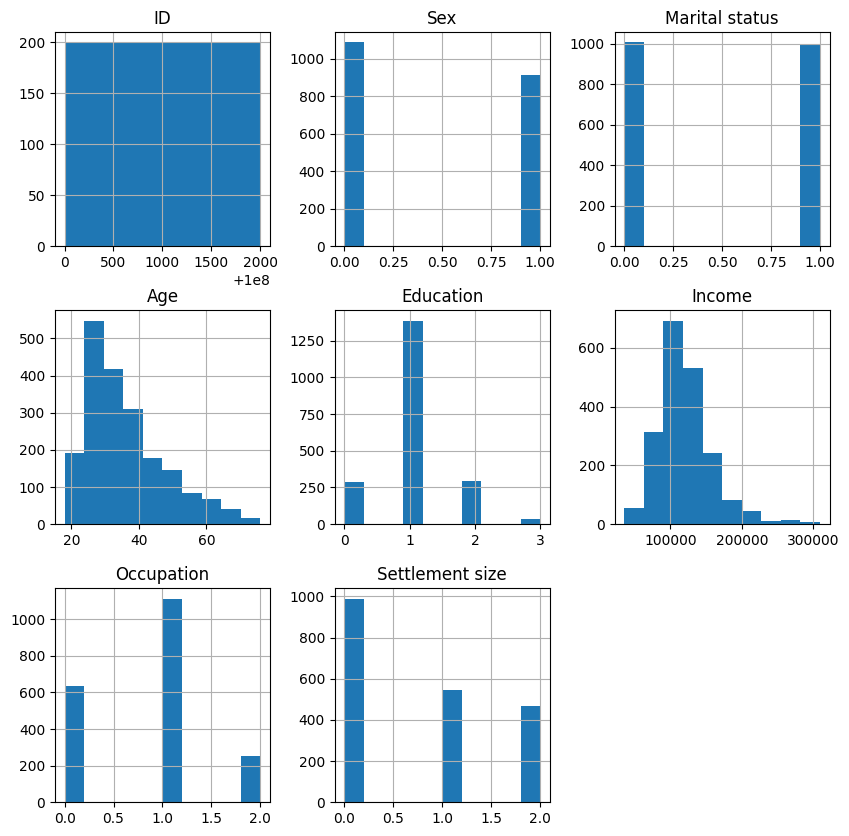

In [5]:
df.hist(figsize = (10,10))

In [6]:
from sklearn.preprocessing import StandardScaler

filter_data = df.drop('ID', axis = 1)

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,-1.421085e-16,5.684342e-17,9.059420e-17,-5.684342e-17,1.563194e-16,2.842171e-17,0.000000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250
min,-9.173988e-01,-9.930243e-01,-1.528532e+00,-1.731068e+00,-2.234225e+00,-1.269525e+00,-0.909730
25%,-9.173988e-01,-9.930243e-01,-7.603825e-01,-6.337243e-02,-6.113281e-01,-1.269525e+00,-0.909730
50%,-9.173988e-01,-9.930243e-01,-2.482829e-01,-6.337243e-02,-1.418903e-01,2.968230e-01,0.321298
75%,1.090038e+00,1.007025e+00,5.198664e-01,-6.337243e-02,4.492952e-01,2.968230e-01,0.321298
max,1.090038e+00,1.007025e+00,3.421764e+00,3.272018e+00,4.945225e+00,1.863171e+00,1.552326


In [9]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=4,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


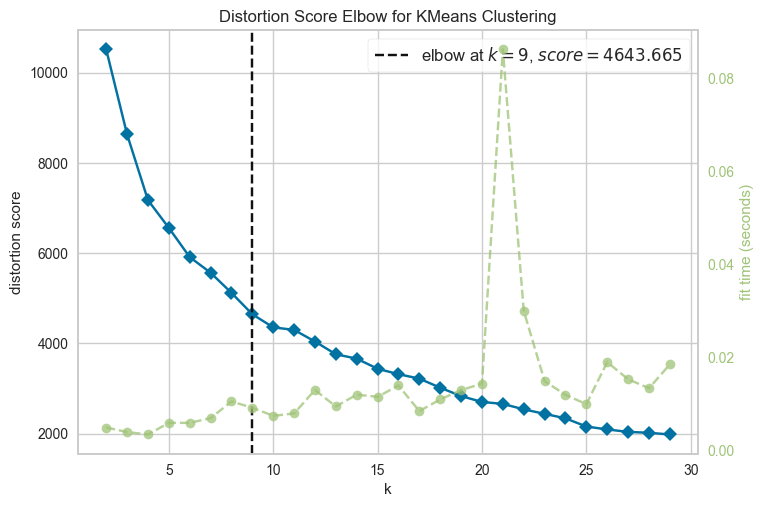

,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,29
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [8]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from copy import deepcopy

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

In [10]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl2=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl2[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [19]:
x_data_cl2['Sex'] = x_data_cl2['Sex'].astype(str)
x_data_cl2['Marital status'] = x_data_cl2['Marital status'].astype(str)
x_data_cl2['cluster'] = x_data_cl2['cluster'].astype(str)
#Aplicar a todas las variables categoricas

In [11]:
x_data_cl2

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,1
1997,0,0,31,0,86400,0,0,3
1998,1,1,24,1,97968,0,0,1


In [21]:
d3=x_data_cl2.sample(n=600)

In [22]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d3, x='Sex', y='Income', z='Age', color='cluster')
fig.show()

In [14]:
import seaborn as sns
import numpy as np

<Axes: xlabel='cluster', ylabel='Income'>

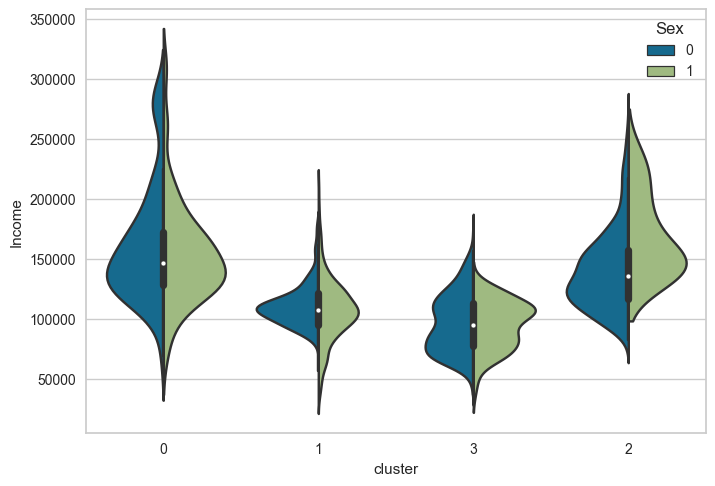

In [26]:
sns.violinplot(data=x_data_cl2, x='cluster', y='Income', fill=True, hue='Sex', split= True)

<Axes: xlabel='cluster', ylabel='Age'>

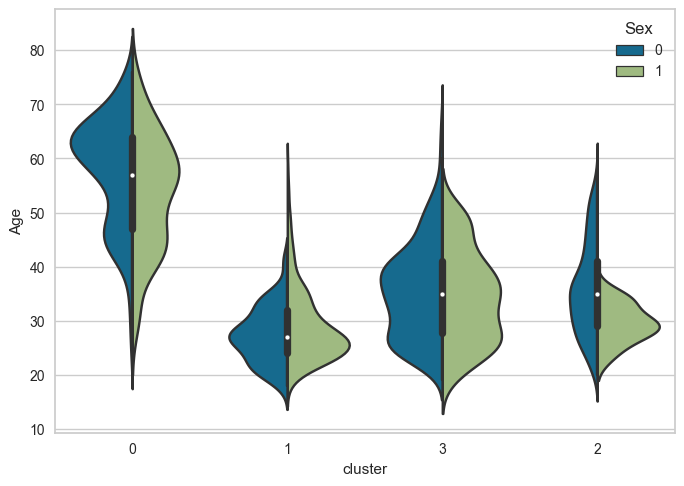

In [27]:
sns.violinplot(data=x_data_cl2, x='cluster', y='Age', fill=True, hue='Sex', split= True)